The following dataset is containing rhombus and squares. Please segment the image such, that you know for every pixel, if it belongs to a rhombus, square, or background. You can find a tutorial on image segmenation here:

http://blog.qure.ai/notes/semantic-segmentation-deep-learning-review

Best, use the SegNet approach (also see: https://arxiv.org/abs/1511.00561). You can also use other approaches, if you whish.

# Libraries

In [1]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import math
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create Data

The input images have size 32x32. Each image contains exactly one square and one circle. On top of that, gaussian noise has been added. The output images are a segmentation. For each pixel, there are 3 outputs (4th dimension). The segmentations are encoded as follows:

-) [1,0,0]            Background

-) [0,1,0]            Rhombus

-) [0,0,1]            Square

In [2]:
# Define total number of samples
tot_number_samples = 10000

# Dimension of the images
dim_image = 32

# Object size
obj_size = 5

# Create a dataset randomly and calculate the necessary labels
X = np.zeros((tot_number_samples,dim_image,dim_image,1),dtype=np.double)
y = np.zeros((tot_number_samples,dim_image,dim_image,3),dtype=np.bool)

# Add to every image a square and a circle
for i in range(tot_number_samples):
    # Give current status
    print("\rProgress: {:.1f}%".format(100.*i/tot_number_samples), end='')
    
    # Find the locations of the circle and square, which do not overlap with each other
    x_circle = random.randint(obj_size,dim_image-1-obj_size)
    y_circle = random.randint(obj_size,dim_image-1-obj_size)
    x_square = random.randint(obj_size,dim_image-1-obj_size)
    y_square = random.randint(obj_size,dim_image-1-obj_size)
    while math.fabs(x_circle-x_square) <= 2*obj_size and math.fabs(y_circle-y_square) <= 2*obj_size:
        x_circle = random.randint(obj_size,dim_image-1-obj_size)
        y_circle = random.randint(obj_size,dim_image-1-obj_size)
        x_square = random.randint(obj_size,dim_image-1-obj_size)
        y_square = random.randint(obj_size,dim_image-1-obj_size)
    
    # Decide for each pixel, if it is part of the circle/square or not 
    for xi in range(dim_image):
        for yi in range(dim_image):
            if math.fabs(xi-x_square)<=obj_size and math.fabs(yi-y_square)<=obj_size: # Part of square
                X[i,xi,yi,0] = 1
                y[i,xi,yi,2] = True
            elif math.fabs(xi-x_circle)+math.fabs(yi-y_circle) <= obj_size: # Part of rhombus
                X[i,xi,yi,0] = 1
                y[i,xi,yi,1] = True
            else:
                y[i,xi,yi,0] = True
    
# Add noise
X = np.random.normal(X,1./3)

# Divide the dataset into a train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #25 % of data is in test set

del X
del y

Progress: 100.0%

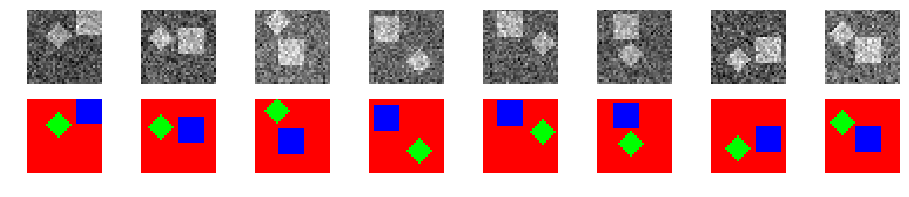

In [3]:
# Plot the first few images (code from: https://github.com/ageron/handson-ml/blob/master/extra_capsnets.ipynb)

n_samples = 8

plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(2, n_samples, index + 1)
    plt.imshow(X_train[index,:,:,0], cmap="gray")
    plt.axis("off")
    
    plt.subplot(2, n_samples, index + 1 + n_samples)
    plt.imshow(y_train[index,:,:,:].astype(np.double))
    plt.axis("off")

plt.show()

# Implement The Model

In [4]:
# Put code here

# Train the Model

In [5]:
# Put code here 